### Importing the neccessery labrary

In [1215]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

### Exploring the Data

In [1216]:
dataTrain=pd.read_csv("./Data/train.csv")
dataTest=pd.read_csv("./Data/test.csv")

In [1217]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [1218]:
dataTrain.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1219]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1220]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Cleaning the data

#### Defining the fucntion to deal with the categorical columns

In [1221]:
def AccuracywithCateg(columnName):
    print(dataTrain[columnName].value_counts())
# calculate the average of the 'values' column for each category
    averages = dataTrain.groupby(columnName)['SalePrice'].mean()

# create a bar plot of the averages
    averages.plot(kind='bar')

# set the axis labels and title
    plt.xlabel(columnName)
    plt.ylabel('Average SalePrice')
    plt.title('Average SalePrice by '+columnName)

# display the plot
    plt.show()

Let's see the LotFrontage columns

In [1222]:
dataTrain["LotFrontage"].corr(dataTrain["SalePrice"])

0.3517990965706781

In [1223]:

#For the street
dataTrain['Street']= dataTrain['Street'].astype('category').cat.codes
dataTest['Street']= dataTest['Street'].astype('category').cat.codes


Now for the street

In [1224]:
#We notice that the column Alley has alot of null values so wa will see the accuracy of that columns with the price
#As we can see there is no high correlation beetween the columns we can delete the Alley columns we will do the same for testing data 
dataTrain['Alley']= dataTrain['Alley'].astype('category').cat.codes
dataTest['Alley']= dataTest['Alley'].astype('category').cat.codes
dataTrain['Alley'].corr(dataTrain['SalePrice'])

-0.09260744997351614

In [1225]:
#The colleration samed neglitable
#Some columns we don't have a lot of inmformation about so wa can delete them 
dataTrain["LotShape"].value_counts()
dictionarymapper={'Reg':3,'IR1':2,'IR2':1,'IR3':0}
dataTrain["LotShape"]=dataTrain["LotShape"].map(dictionarymapper)
dataTest["LotShape"]=dataTest["LotShape"].map(dictionarymapper)
#For the LandContour column
dataTrain["LandContour"].value_counts()
dictionarymapper={'Low':-1,'Lvl':0,'Bnk':1,'HLS':2}
dataTrain["LandContour"]=dataTrain["LandContour"].map(dictionarymapper)
dataTest["LandContour"]=dataTest["LandContour"].map(dictionarymapper)
#All the houses have the same value in the Utilities comlumns 


In [1226]:
dataTrain['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


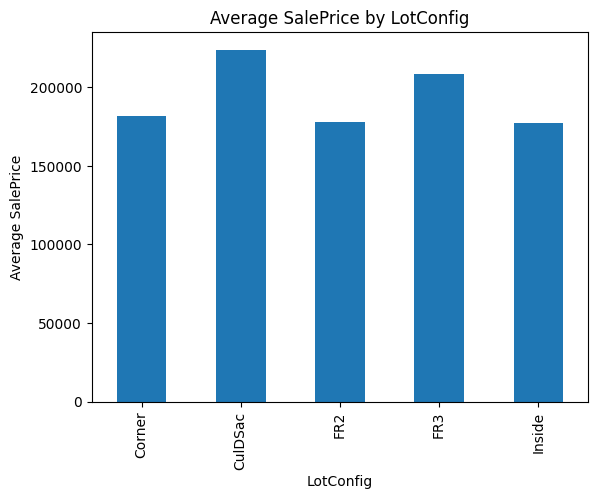

In [1227]:
AccuracywithCateg('LotConfig')

As we can see the average of the SalePrice of the houses is quitly the same for the LotConfig columns we can ignore these column for now on<>

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


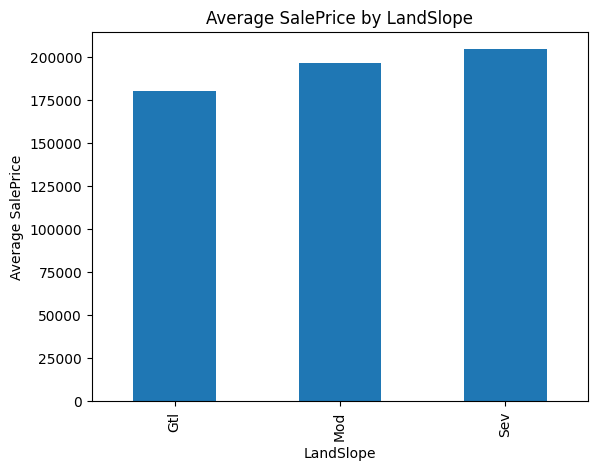

In [1228]:
AccuracywithCateg('LandSlope')

we can neglate the effect of SaleCOndition on the price cause the normal category domaine so we can delete this column

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


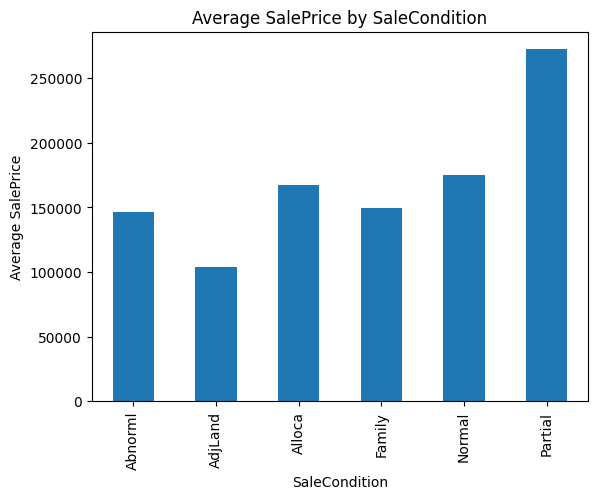

In [1229]:
AccuracywithCateg('SaleCondition')

In [1230]:
dataTrain["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


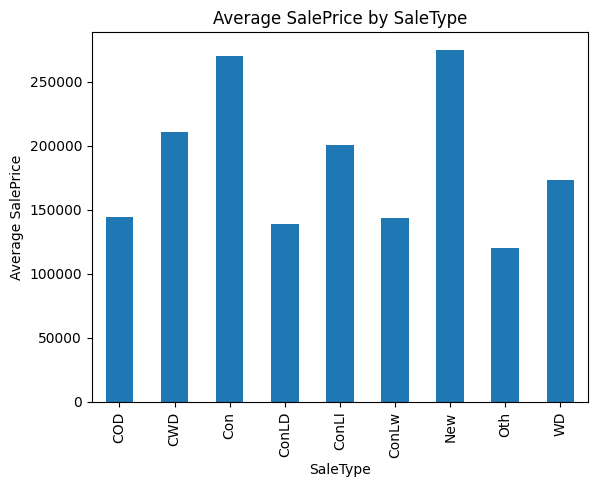

In [1231]:
AccuracywithCateg('SaleType')

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


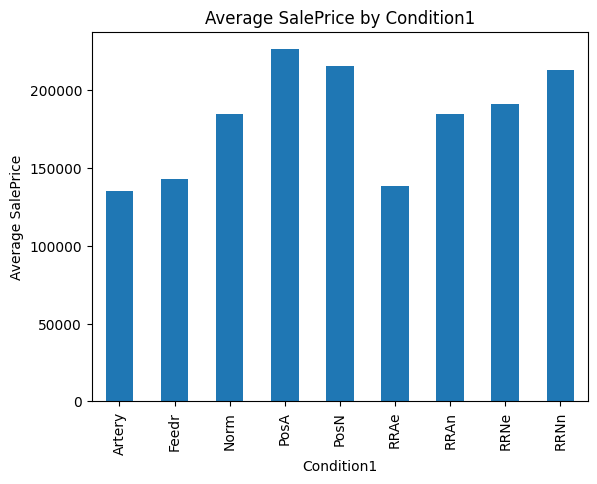

In [1232]:
AccuracywithCateg('Condition1')

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


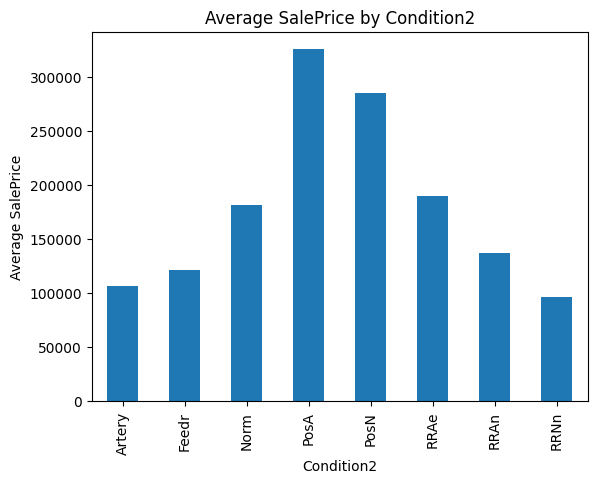

In [1233]:
AccuracywithCateg('Condition2')

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


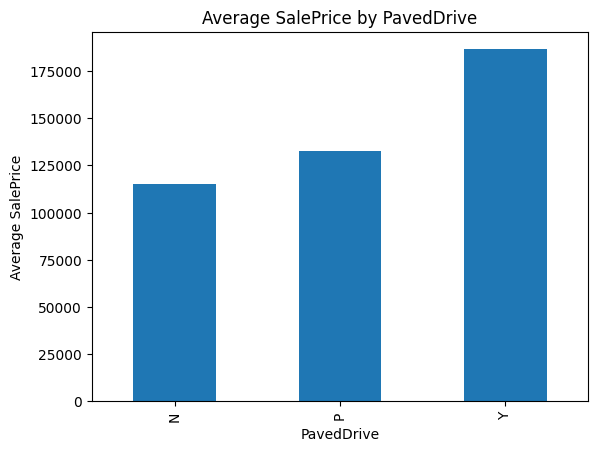

In [1234]:
AccuracywithCateg("PavedDrive")

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


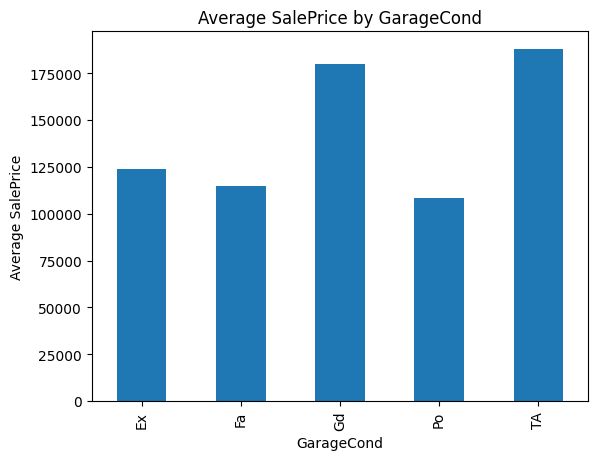

In [1235]:
AccuracywithCateg("GarageCond")

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


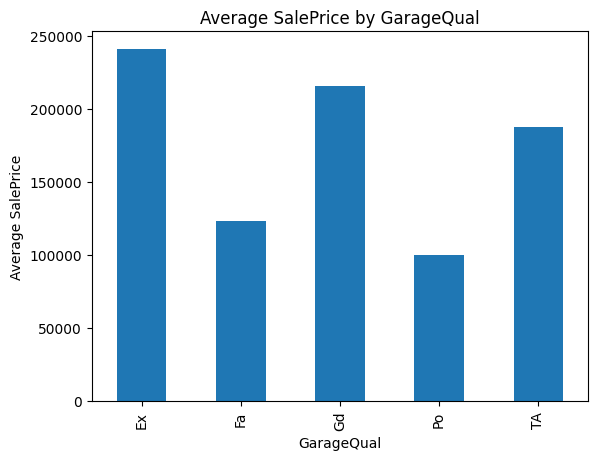

In [1236]:
AccuracywithCateg("GarageQual")

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


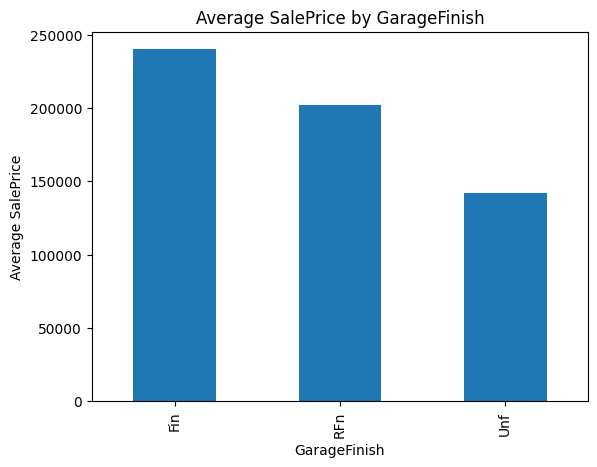

In [1237]:
AccuracywithCateg("GarageFinish")

In [1238]:
dataTrain["GarageFinish"]
dictionarymapper={"Fin":2,"RFn":1,"Unf":0}
dataTrain["GarageFinish"]=dataTrain["GarageFinish"].map(dictionarymapper)
dataTest["GarageFinish"]=dataTest["GarageFinish"].map(dictionarymapper)

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


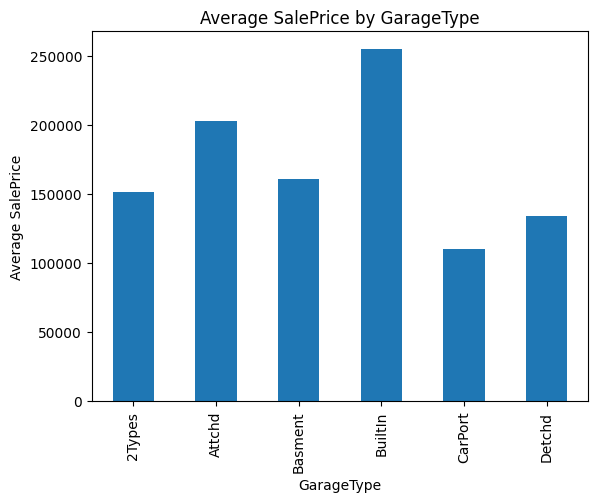

In [1239]:
AccuracywithCateg("GarageType")

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


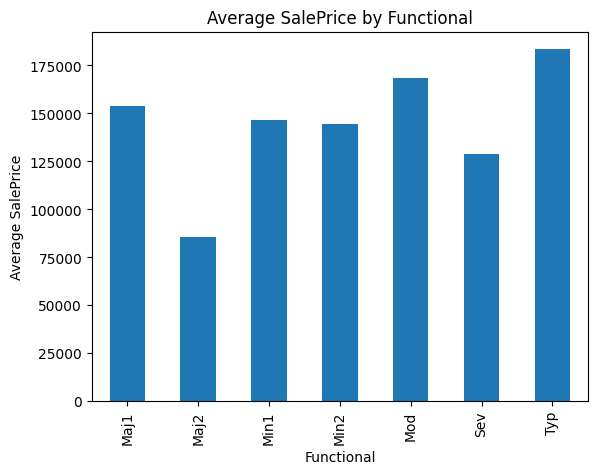

In [1240]:
AccuracywithCateg("Functional")

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


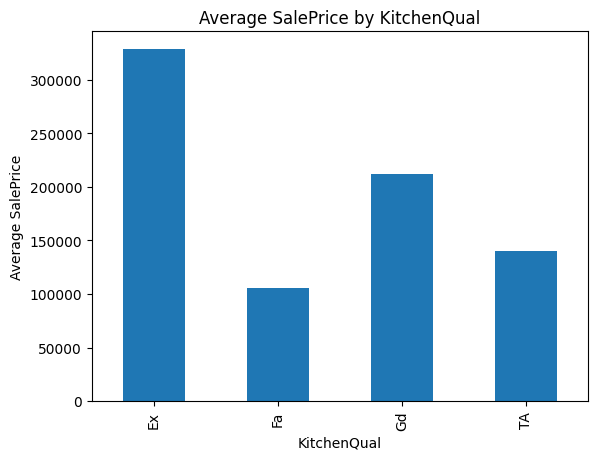

In [1241]:
AccuracywithCateg("KitchenQual")
dictionarymapper={"TA":1,"Gd":2,"Ex":3,"Fa":0}
dataTrain["KitchenQual"]=dataTrain["KitchenQual"].map(dictionarymapper)
dataTest["KitchenQual"]=dataTest["KitchenQual"].map(dictionarymapper)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


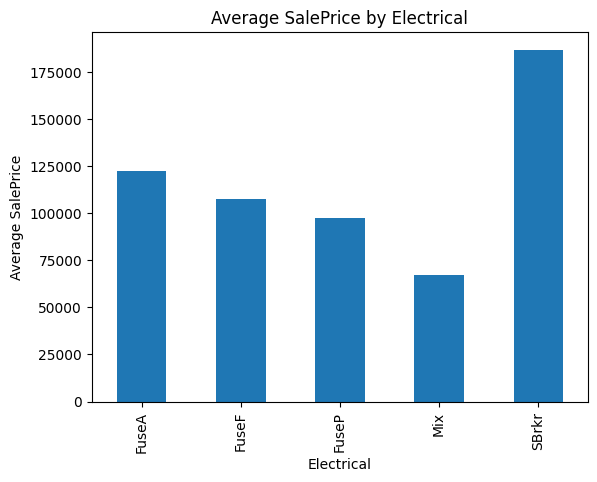

In [1242]:
AccuracywithCateg("Electrical")

Y    1365
N      95
Name: CentralAir, dtype: int64


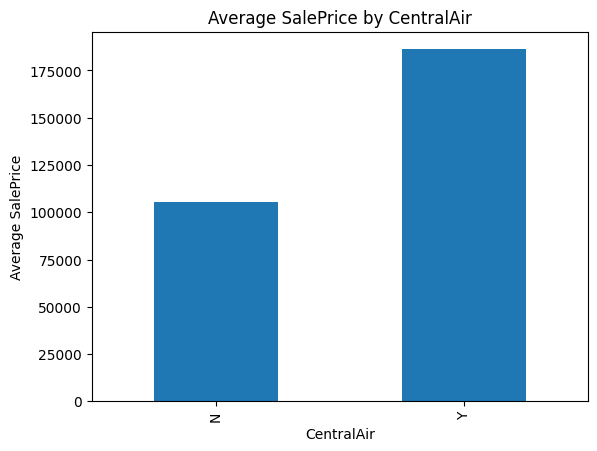

In [1243]:
AccuracywithCateg("CentralAir")

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


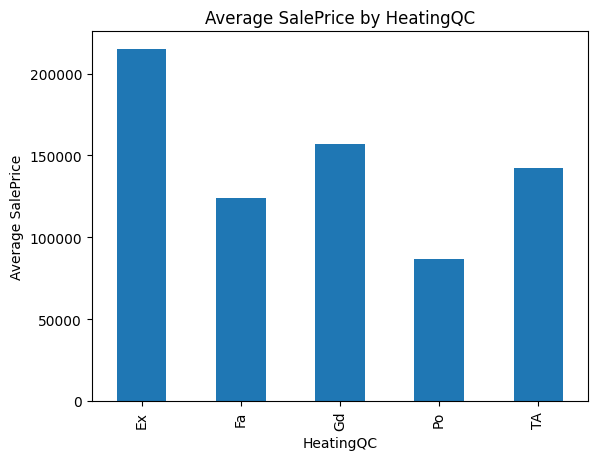

In [1244]:
AccuracywithCateg("HeatingQC")
dictionarymapper={"TA":1,"Gd":2,"Ex":3,"Fa":0}
dataTrain["HeatingQC"]=dataTrain["HeatingQC"].map(dictionarymapper)

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


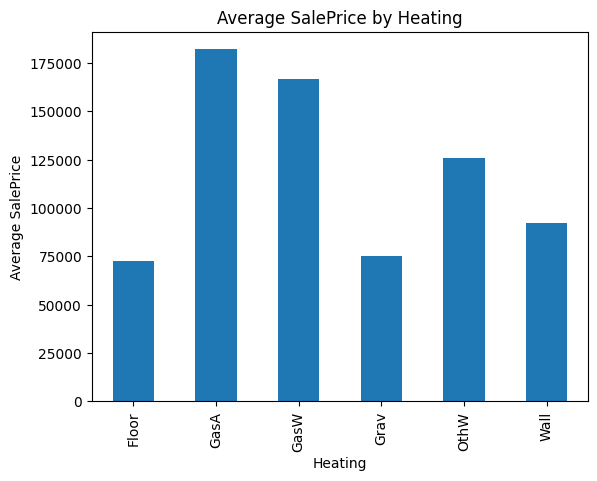

In [1245]:
AccuracywithCateg("Heating")

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


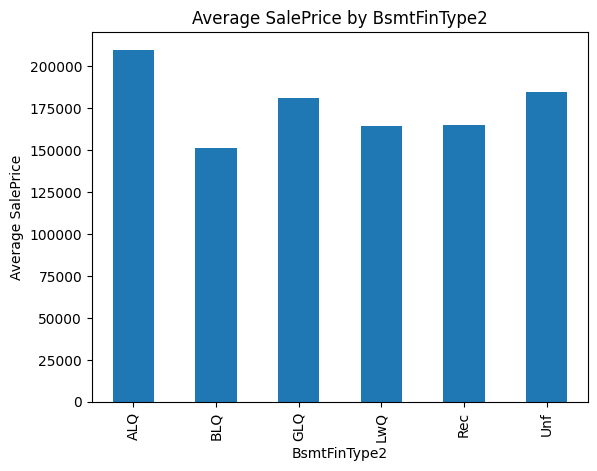

In [1246]:
AccuracywithCateg("BsmtFinType2")


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


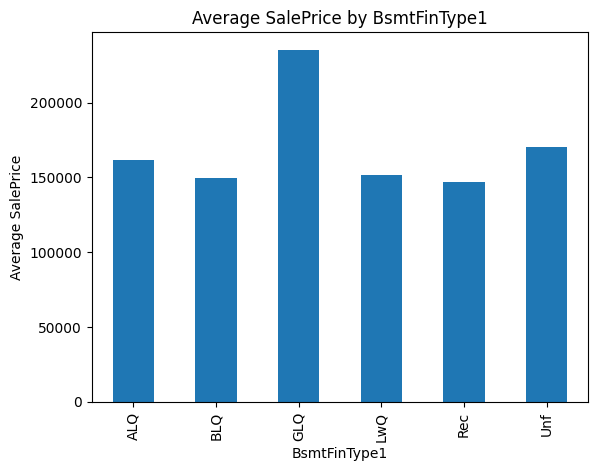

In [1247]:
AccuracywithCateg("BsmtFinType1")
dictionarymapper={"Unf":1,"GLQ":7,"ALQ":6,"BLQ":5,"Rec":4,"LwQ":2}
dataTrain["BsmtFinType1"]=dataTrain["BsmtFinType1"].map(dictionarymapper)
dataTest["BsmtFinType1"]=dataTest["BsmtFinType1"].map(dictionarymapper)

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


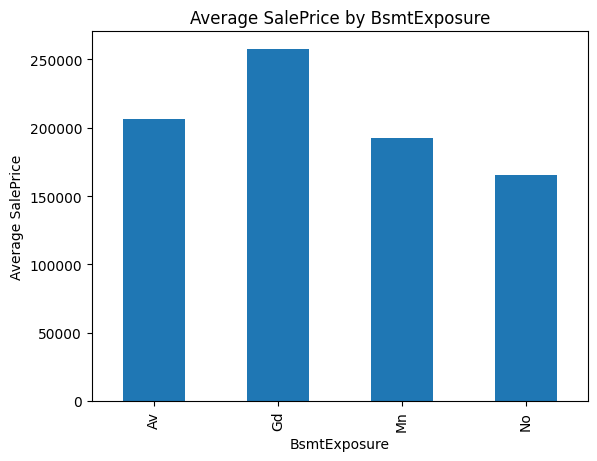

In [1248]:
AccuracywithCateg("BsmtExposure")

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


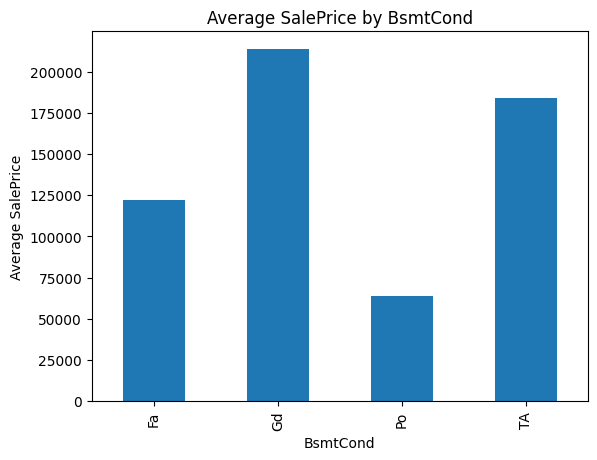

In [1249]:
AccuracywithCateg("BsmtCond")

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


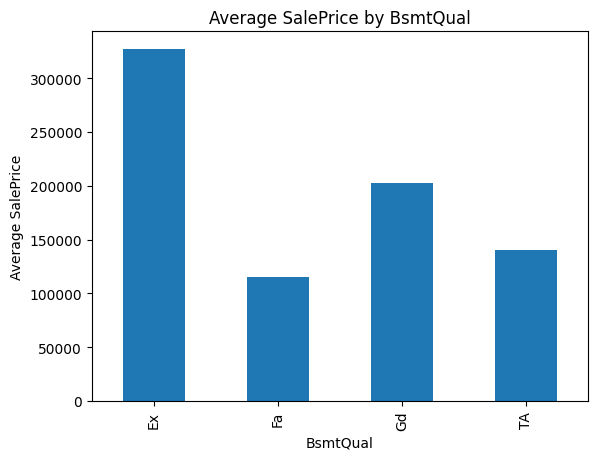

In [1250]:
AccuracywithCateg("BsmtQual")
dictionarymapper={"TA":1,"Gd":2,"Ex":3,"Fa":0}
dataTrain["BsmtQual"]=dataTrain["BsmtQual"].map(dictionarymapper)
dataTest["BsmtQual"]=dataTest["BsmtQual"].map(dictionarymapper)

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


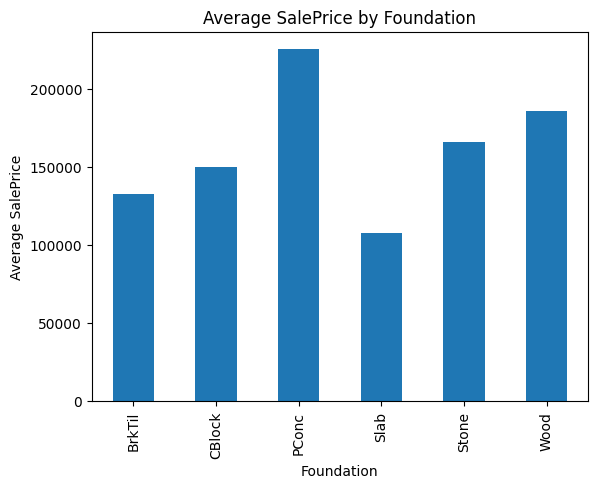

In [1251]:
AccuracywithCateg("Foundation")

In [1252]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


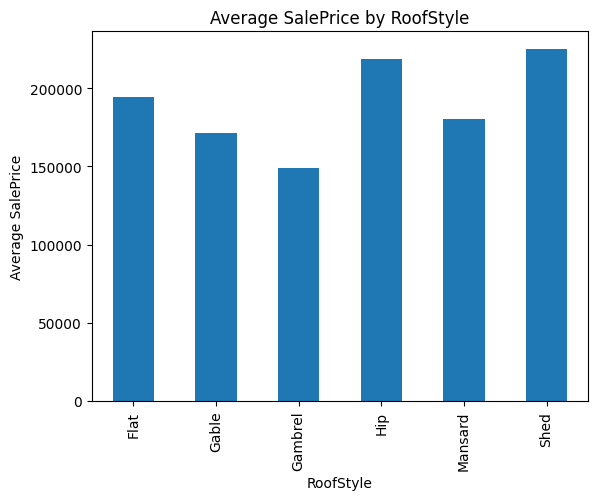

In [1253]:
AccuracywithCateg("RoofStyle")

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64


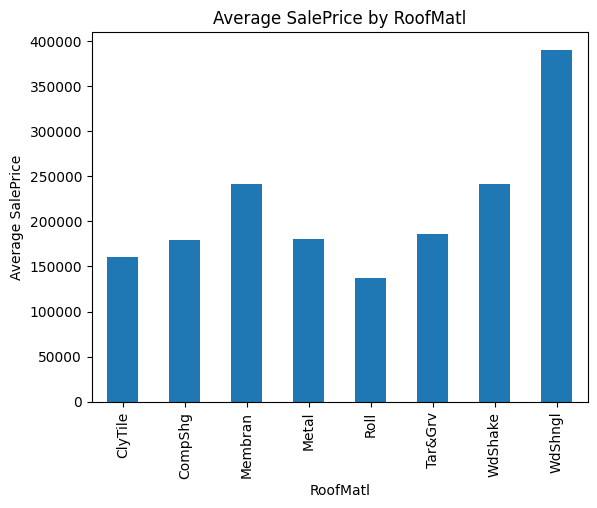

In [1254]:
AccuracywithCateg("RoofMatl")

All the value that dominate have the quitly the same SalePRice average ,we can ignore these one also

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


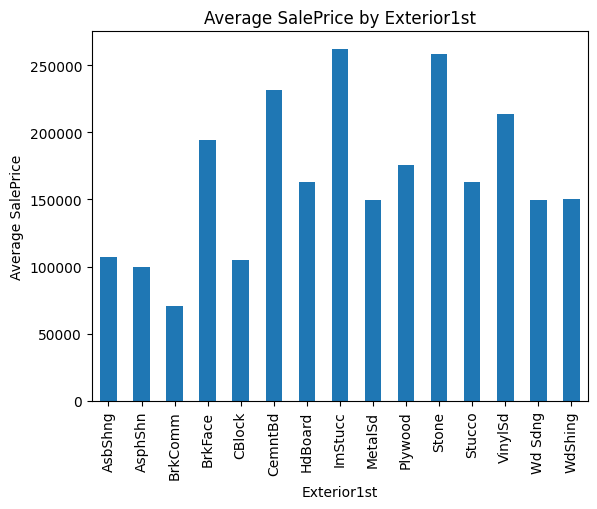

In [1255]:
AccuracywithCateg("Exterior1st")

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


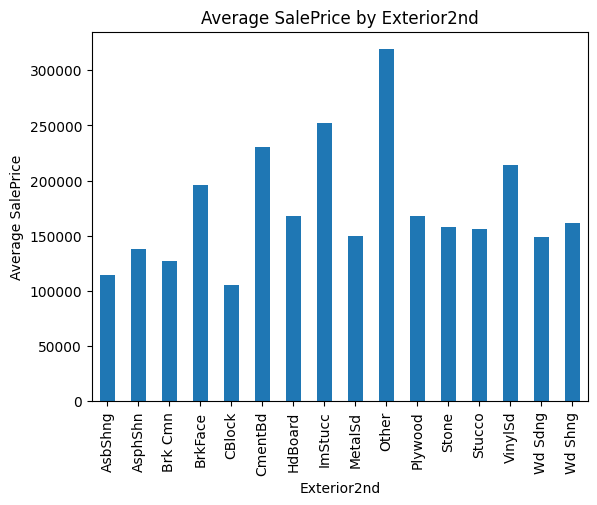

In [1256]:
AccuracywithCateg("Exterior2nd")

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


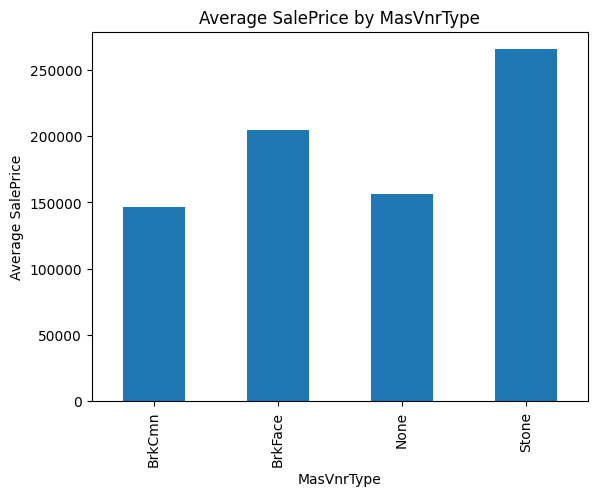

In [1257]:
AccuracywithCateg("MasVnrType")

There is a lot of messing value so wa can just delete these column

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


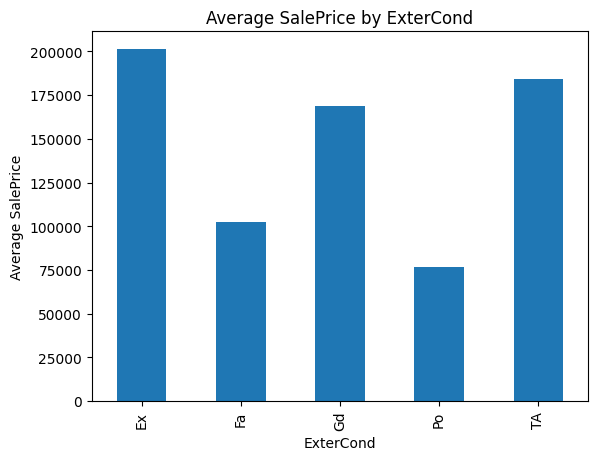

In [1258]:
AccuracywithCateg("ExterCond")

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


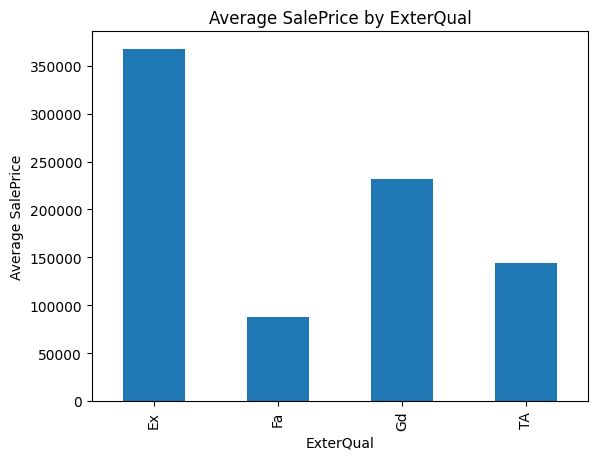

In [1259]:
AccuracywithCateg("ExterQual")
dictionarymapper={"TA":1,"Gd":2,"Ex":3,"Fa":0}
dataTrain["ExterQual"]=dataTrain["ExterQual"].map(dictionarymapper)
dataTest["ExterQual"]=dataTest["ExterQual"].map(dictionarymapper)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


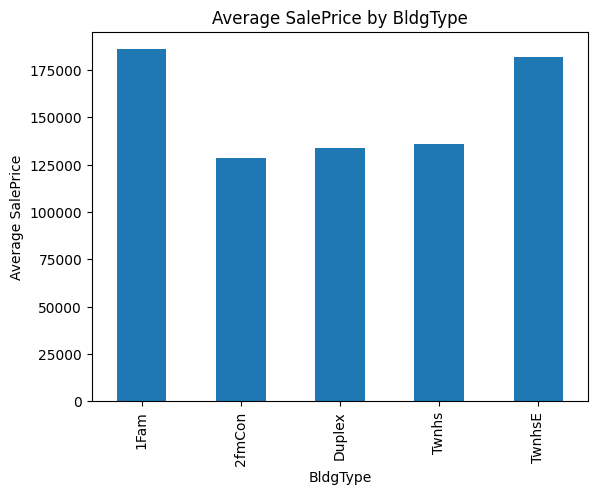

In [1260]:
AccuracywithCateg("BldgType")

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


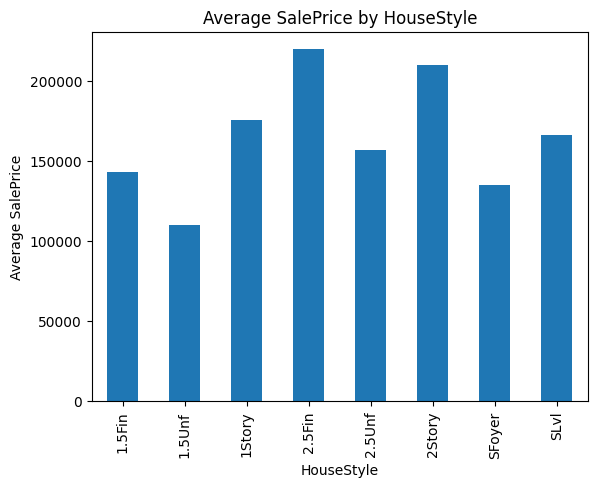

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


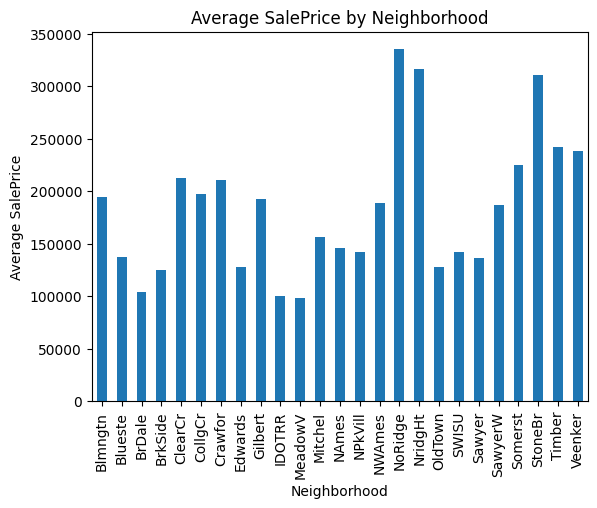

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


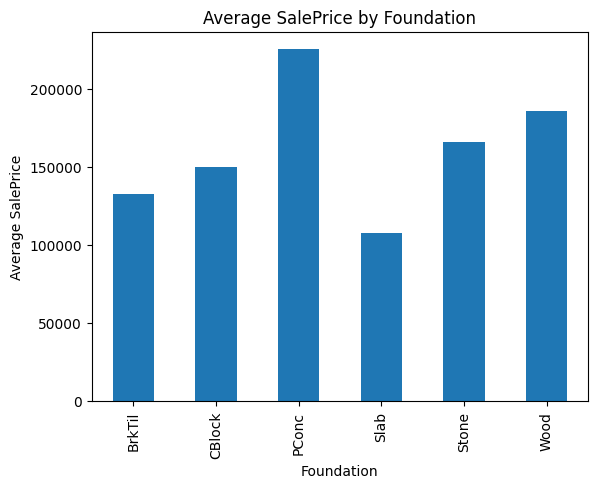

In [1261]:
AccuracywithCateg("HouseStyle")
AccuracywithCateg("Neighborhood")
AccuracywithCateg("Foundation")

In [1262]:
#delete all uncessary columns
dataTrain=dataTrain.drop(["Street","LandSlope","Alley","FireplaceQu","PoolQC","Fence","MiscFeature","GarageType","Functional","Condition1",
                          "Condition2","SaleType","SaleCondition","PavedDrive","GarageQual","GarageCond",
                          "Electrical","MasVnrType","RoofMatl","Exterior1st","Exterior2nd","RoofStyle",
                          "CentralAir","Heating","BsmtFinType2","BsmtExposure","BsmtCond",
                          "ExterCond","Utilities","BldgType","LotConfig"
                          ],axis=1)
dataTest=dataTest.drop(["Street","LandSlope","Alley","FireplaceQu","PoolQC","Fence","MiscFeature","GarageType","Functional","Condition1",
                          "Condition2","SaleType","SaleCondition","PavedDrive","GarageQual","GarageCond",
                          "Electrical","MasVnrType","RoofMatl","Exterior1st","Exterior2nd","RoofStyle",
                          "CentralAir","Heating","BsmtFinType2","BsmtExposure","BsmtCond",
                          "ExterCond","Utilities","BldgType","LotConfig"
                          ],axis=1)

In [1263]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   Neighborhood   1459 non-null   object 
 8   HouseStyle     1459 non-null   object 
 9   OverallQual    1459 non-null   int64  
 10  OverallCond    1459 non-null   int64  
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  MasVnrArea     1444 non-null   float64
 14  ExterQual      1459 non-null   int64  
 15  Foundation     1459 non-null   object 
 16  BsmtQual       1415 non-null   float64
 17  BsmtFinType1   1417 non-null   float64
 18  BsmtFinS

In [1264]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  MasVnrArea     1452 non-null   float64
 14  ExterQual      1460 non-null   int64  
 15  Foundation     1460 non-null   object 
 16  BsmtQual       1423 non-null   float64
 17  BsmtFinType1   1423 non-null   float64
 18  BsmtFinS

In [1265]:
dataTrain.dropna(inplace=True)
dataTest.dropna(inplace=True)


1Story    541
2Story    347
1.5Fin    117
SLvl       44
SFoyer     23
1.5Unf      9
2.5Unf      9
2.5Fin      6
Name: HouseStyle, dtype: int64


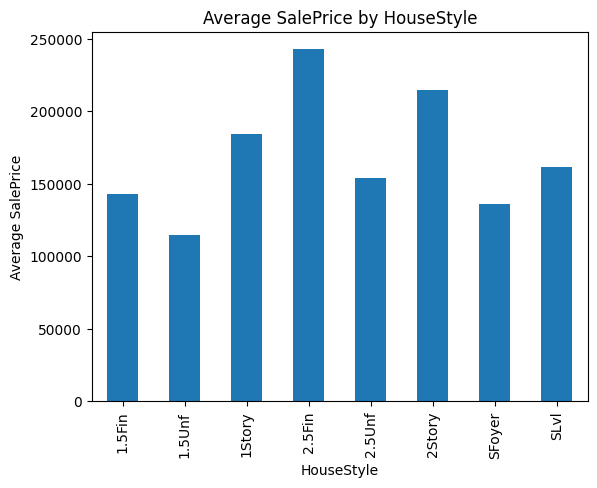

NAmes      173
CollgCr    123
OldTown     96
Somerst     75
NridgHt     75
Edwards     65
Gilbert     49
NWAmes      45
Sawyer      44
SawyerW     44
BrkSide     42
Crawfor     41
NoRidge     33
Mitchel     30
Timber      30
IDOTRR      26
StoneBr     20
SWISU       19
BrDale      15
Blmngtn     14
ClearCr     11
MeadowV     10
Veenker      7
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64


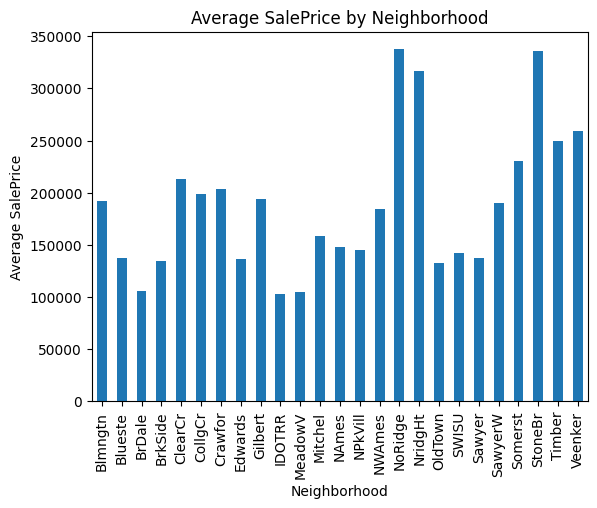

In [1266]:

#We can see a non negleted correlation between the two columns so we can keep it
#For the MSZoning column we can convert the category to columns with 0 or 1 
dataTrain=dataTrain.join(pd.get_dummies(dataTrain.MSZoning))
dataTrain=dataTrain.drop(["MSZoning"],axis=1)

dataTrain=dataTrain.join(pd.get_dummies(dataTrain.Foundation))
dataTrain=dataTrain.drop(["Foundation"],axis=1)
AccuracywithCateg("HouseStyle")
dataTrain=dataTrain.join(pd.get_dummies(dataTrain.HouseStyle))
dataTrain=dataTrain.drop(["HouseStyle"],axis=1)
AccuracywithCateg("Neighborhood")
dataTrain=dataTrain.join(pd.get_dummies(dataTrain.Neighborhood))
dataTrain=dataTrain.drop(["Neighborhood"],axis=1)

#the same for the test data
dataTest=dataTest.join(pd.get_dummies(dataTest.MSZoning))
dataTest=dataTest.drop(["MSZoning"],axis=1)
dataTest=dataTest.join(pd.get_dummies(dataTest.Foundation))
dataTest=dataTest.drop(["Foundation"],axis=1)
dataTest=dataTest.join(pd.get_dummies(dataTest.HouseStyle))
dataTest=dataTest.drop(["HouseStyle"],axis=1)
dataTest=dataTest.join(pd.get_dummies(dataTest.Neighborhood))
dataTest=dataTest.drop(["Neighborhood"],axis=1)


In [1267]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1458
Data columns (total 87 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1116 non-null   int64  
 1   MSSubClass     1116 non-null   int64  
 2   LotFrontage    1116 non-null   float64
 3   LotArea        1116 non-null   int64  
 4   LotShape       1116 non-null   int64  
 5   LandContour    1116 non-null   int64  
 6   OverallQual    1116 non-null   int64  
 7   OverallCond    1116 non-null   int64  
 8   YearBuilt      1116 non-null   int64  
 9   YearRemodAdd   1116 non-null   int64  
 10  MasVnrArea     1116 non-null   float64
 11  ExterQual      1116 non-null   int64  
 12  BsmtQual       1116 non-null   float64
 13  BsmtFinType1   1116 non-null   float64
 14  BsmtFinSF1     1116 non-null   float64
 15  BsmtFinSF2     1116 non-null   float64
 16  BsmtUnfSF      1116 non-null   float64
 17  TotalBsmtSF    1116 non-null   float64
 18  HeatingQ

In [1268]:
dataTrain.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1459
Data columns (total 89 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1096 non-null   int64  
 1   MSSubClass     1096 non-null   int64  
 2   LotFrontage    1096 non-null   float64
 3   LotArea        1096 non-null   int64  
 4   LotShape       1096 non-null   int64  
 5   LandContour    1096 non-null   int64  
 6   OverallQual    1096 non-null   int64  
 7   OverallCond    1096 non-null   int64  
 8   YearBuilt      1096 non-null   int64  
 9   YearRemodAdd   1096 non-null   int64  
 10  MasVnrArea     1096 non-null   float64
 11  ExterQual      1096 non-null   int64  
 12  BsmtQual       1096 non-null   float64
 13  BsmtFinType1   1096 non-null   float64
 14  BsmtFinSF1     1096 non-null   int64  
 15  BsmtFinSF2     1096 non-null   int64  
 16  BsmtUnfSF      1096 non-null   int64  
 17  TotalBsmtSF    1096 non-null   int64  
 18  HeatingQ

Get the difference beetwen the testdata and the training data

In [1269]:
test=dataTest.columns
train=dataTrain.columns
for x in train:
    if x not in test:
        print(x)
        


SalePrice
2.5Fin


In [1270]:
dataTrain=dataTrain.drop(["2.5Fin"],axis=1)

### Feature enginering

#### The  correlation

<AxesSubplot: >

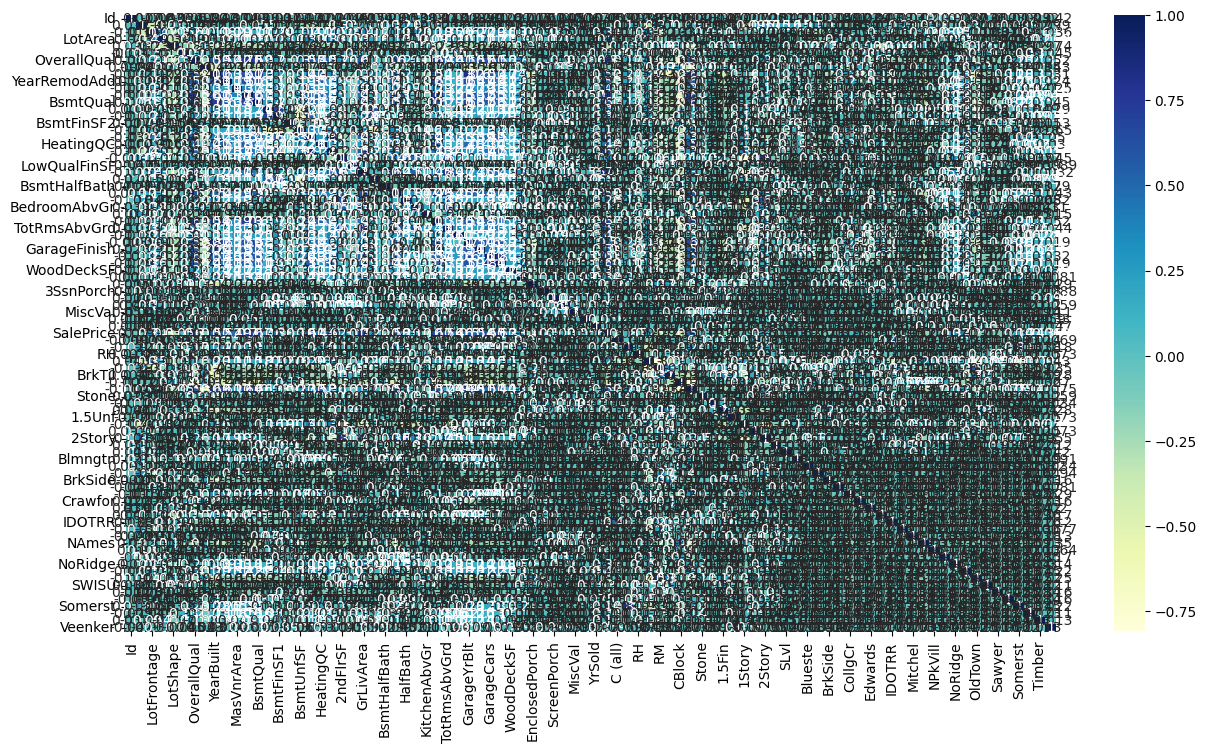

In [1271]:
plt.figure(figsize=(15,8))
sns.heatmap(dataTrain.corr(),annot=True,cmap="YlGnBu")

As we can see due to the high number of columns we cannot see clearly the correlatoin metrix

In [1272]:
dictCorrelation={}
for col in dataTrain.columns:
    dictCorrelation[col]=dataTrain[col].corr(dataTrain["SalePrice"])

In [1273]:
dictCorrelation


{'Id': -0.049889429293363416,
 'MSSubClass': -0.09076408977021135,
 'LotFrontage': 0.34368421619969447,
 'LotArea': 0.3017118162182024,
 'LotShape': -0.312416936861621,
 'LandContour': 0.056061209625014416,
 'OverallQual': 0.7953306900713457,
 'OverallCond': -0.13851892311813122,
 'YearBuilt': 0.5227214892898308,
 'YearRemodAdd': 0.5188131935969421,
 'MasVnrArea': 0.48573726090430114,
 'ExterQual': 0.6957785480950487,
 'BsmtQual': 0.6717361435681987,
 'BsmtFinType1': 0.26295442837103195,
 'BsmtFinSF1': 0.3789998446765938,
 'BsmtFinSF2': -0.03417090088195171,
 'BsmtUnfSF': 0.19326564841021188,
 'TotalBsmtSF': 0.6146847616441447,
 'HeatingQC': 0.4402431451564701,
 '1stFlrSF': 0.6175281599427496,
 '2ndFlrSF': 0.3005156817999147,
 'LowQualFinSF': -0.0037643060771008446,
 'GrLivArea': 0.70675877030132,
 'BsmtFullBath': 0.22417030573256402,
 'BsmtHalfBath': -0.041822912802235636,
 'FullBath': 0.5776725949044073,
 'HalfBath': 0.25724549702207705,
 'BedroomAbvGr': 0.16750209782022768,
 'Kitche

#### Linear Regression model 


Spliting the data

In [1274]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X,y=dataTrain.drop(['SalePrice'],axis=1),dataTrain['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_trainS,X_testS=scaler.fit_transform(X_train),scaler.fit_transform(X_test)

In [1275]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
regS=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)


0.8561424879683659

Random forest Regression

In [1276]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(X_train,y_train)

forest.score(X_test,y_test)

0.888637006932818

In [1277]:
forestS=RandomForestRegressor()
forestS.fit(X_trainS,y_train)

forestS.score(X_testS,y_test)

0.8957241837045867

In [1278]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[30,50,400],
    'max_features':[8,12,20]    
}

grid_search=GridSearchCV(forest,param_grid=param_grid,cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'n_estimators': [30, 50, 400]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [1279]:
bestforest=grid_search.best_estimator_

In [1280]:
bestforest.score(X_test,y_test)

0.9021108830097719

In [1281]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1458
Data columns (total 87 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1116 non-null   int64  
 1   MSSubClass     1116 non-null   int64  
 2   LotFrontage    1116 non-null   float64
 3   LotArea        1116 non-null   int64  
 4   LotShape       1116 non-null   int64  
 5   LandContour    1116 non-null   int64  
 6   OverallQual    1116 non-null   int64  
 7   OverallCond    1116 non-null   int64  
 8   YearBuilt      1116 non-null   int64  
 9   YearRemodAdd   1116 non-null   int64  
 10  MasVnrArea     1116 non-null   float64
 11  ExterQual      1116 non-null   int64  
 12  BsmtQual       1116 non-null   float64
 13  BsmtFinType1   1116 non-null   float64
 14  BsmtFinSF1     1116 non-null   float64
 15  BsmtFinSF2     1116 non-null   float64
 16  BsmtUnfSF      1116 non-null   float64
 17  TotalBsmtSF    1116 non-null   float64
 18  HeatingQ

In [1282]:
prediction=bestforest.predict(X_test)
prediction = pd.DataFrame({'predicted Price': prediction})

prediction=X_test.join(prediction)
# write the dataframe to a CSV file
prediction.to_csv('output.csv', index=False)